In [1]:
%config Completer.use_jedi = False
from solaris.data import data_dir
import solaris as sol
import os
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.ops import cascaded_union
import cv2
import rasterio as rio
import pycocotools.mask as mask_util
import shapely
import math

C:\Users\rasha\.conda\envs\omdena_energy\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rasha\.conda\envs\omdena_energy\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rasha\.conda\envs\omdena_energy\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rasha\.conda\envs\omdena_energy\lib\site-packages

In [2]:
from post_processing_pipeline import Post_Process

In [11]:
# Test our pipeline
img_name = 'SN2_buildings_train_AOI_2_Vegas_PS-RGB_img101.tif'
data_dir = 'D:/SpaceNet_TrainData/train/AOI_2_Vegas/Vegas_tif/'
image = rio.open(os.path.join(data_dir, img_name))
coco_file = 'D:/coco_instances_results (3).json'


In [18]:
obj=Post_Process(coco_file, image, img_name, 0.7)
mask, geo_df_full = obj.get_full_post_process()

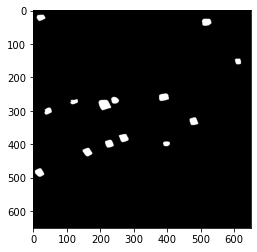

In [27]:
plt.imshow(mask, cmap='gray')

In [22]:
# Save the results in a json format
obj.append_to_json('D:/coco_instances_results (3)_results.json')
obj.save_to_csv('D:/coco_instances_results (3)_results.csv')

In [23]:
geo_df_full.iloc[0].geometry.area

2.6316892064196443e-09

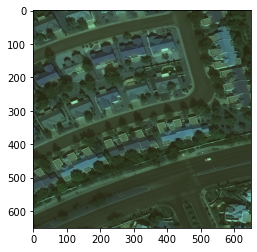

In [26]:
img = cv2.imread('D:/SpaceNet_TrainData/train/AOI_2_Vegas/Vegas_RGB/SN2_buildings_train_AOI_2_Vegas_PS-RGB_img101.png')
plt.imshow(img)